# Penalized Regression Approaches on Boston Housing Data 

In [1]:
require(data.table, quietly = TRUE)
require(openxlsx, quietly = TRUE)
require(ggplot2, quietly = TRUE)
require(glmnet, quietly = TRUE)
data_path='/home/baydogan/Courses/Şişecam/data/housingdata.xlsx'
data=data.table(read.xlsx(data_path,sheet='data'))
head(data,10)

Loaded glmnet 4.1-7



CRIM    ZN   INDUS CHAS NOX   RM    AGE   DIS    RAD TAX PTRATIO B     
1  0.00632 18.0 2.31  0    0.538 6.575  65.2 4.0900 1   296 15.3    396.90
2  0.02731  0.0 7.07  0    0.469 6.421  78.9 4.9671 2   242 17.8    396.90
3  0.02729  0.0 7.07  0    0.469 7.185  61.1 4.9671 2   242 17.8    392.83
4  0.03237  0.0 2.18  0    0.458 6.998  45.8 6.0622 3   222 18.7    394.63
5  0.06905  0.0 2.18  0    0.458 7.147  54.2 6.0622 3   222 18.7    396.90
6  0.02985  0.0 2.18  0    0.458 6.430  58.7 6.0622 3   222 18.7    394.12
7  0.08829 12.5 7.87  0    0.524 6.012  66.6 5.5605 5   311 15.2    395.60
8  0.14455 12.5 7.87  0    0.524 6.172  96.1 5.9505 5   311 15.2    396.90
9  0.21124 12.5 7.87  0    0.524 5.631 100.0 6.0821 5   311 15.2    386.63
10 0.17004 12.5 7.87  0    0.524 6.004  85.9 6.5921 5   311 15.2    386.71
   LSTAT MEDV
1   4.98 24.0
2   9.14 21.6
3   4.03 34.7
4   2.94 33.4
5   5.33 36.2
6   5.21 28.7
7  12.43 22.9
8  19.15 27.1
9  29.93 16.5
10 17.10 18.9

In [2]:
classification_data=copy(data)
classification_data[,is_expensive:=as.numeric(MEDV>quantile(MEDV,0.5))]
classification_data[,MEDV:=NULL]
head(classification_data,10)

CRIM    ZN   INDUS CHAS NOX   RM    AGE   DIS    RAD TAX PTRATIO B     
1  0.00632 18.0 2.31  0    0.538 6.575  65.2 4.0900 1   296 15.3    396.90
2  0.02731  0.0 7.07  0    0.469 6.421  78.9 4.9671 2   242 17.8    396.90
3  0.02729  0.0 7.07  0    0.469 7.185  61.1 4.9671 2   242 17.8    392.83
4  0.03237  0.0 2.18  0    0.458 6.998  45.8 6.0622 3   222 18.7    394.63
5  0.06905  0.0 2.18  0    0.458 7.147  54.2 6.0622 3   222 18.7    396.90
6  0.02985  0.0 2.18  0    0.458 6.430  58.7 6.0622 3   222 18.7    394.12
7  0.08829 12.5 7.87  0    0.524 6.012  66.6 5.5605 5   311 15.2    395.60
8  0.14455 12.5 7.87  0    0.524 6.172  96.1 5.9505 5   311 15.2    396.90
9  0.21124 12.5 7.87  0    0.524 5.631 100.0 6.0821 5   311 15.2    386.63
10 0.17004 12.5 7.87  0    0.524 6.004  85.9 6.5921 5   311 15.2    386.71
   LSTAT is_expensive
1   4.98 1           
2   9.14 1           
3   4.03 1           
4   2.94 1           
5   5.33 1           
6   5.21 1           
7  12.43 1           
8  19.15 1           
9  29.93 0           
10 17.10 0

# Linear Regression
We are going to fit a linear regression model to predict MEDV


Call:
lm(formula = MEDV ~ ., data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.595  -2.730  -0.518   1.777  26.199 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.646e+01  5.103e+00   7.144 3.28e-12 ***
CRIM        -1.080e-01  3.286e-02  -3.287 0.001087 ** 
ZN           4.642e-02  1.373e-02   3.382 0.000778 ***
INDUS        2.056e-02  6.150e-02   0.334 0.738288    
CHAS         2.687e+00  8.616e-01   3.118 0.001925 ** 
NOX         -1.777e+01  3.820e+00  -4.651 4.25e-06 ***
RM           3.810e+00  4.179e-01   9.116  < 2e-16 ***
AGE          6.922e-04  1.321e-02   0.052 0.958229    
DIS         -1.476e+00  1.995e-01  -7.398 6.01e-13 ***
RAD          3.060e-01  6.635e-02   4.613 5.07e-06 ***
TAX         -1.233e-02  3.760e-03  -3.280 0.001112 ** 
PTRATIO     -9.527e-01  1.308e-01  -7.283 1.31e-12 ***
B            9.312e-03  2.686e-03   3.467 0.000573 ***
LSTAT       -5.248e-01  5.072e-02 -10.347  < 2e-16 ***
---
Signif. codes:  0 ‘

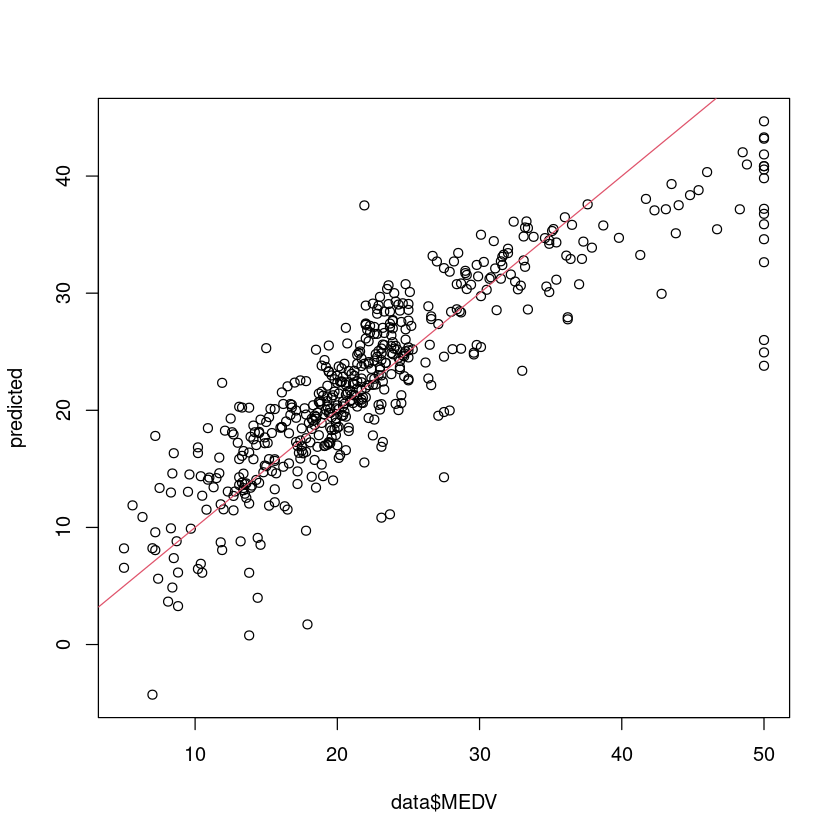

In [3]:
fit_lreg=lm(MEDV~.,data)
summary(fit_lreg)
predicted=predict(fit_lreg,data)
plot(data$MEDV,predicted)
abline(a=0,b=1,col=2)

#require(fpp2)
#checkresiduals(fit_lreg)

A model without the intercept


Call:
lm(formula = MEDV ~ -1 + ., data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-21.1100  -2.5630  -0.5529   1.6546  30.7254 

Coefficients:
         Estimate Std. Error t value Pr(>|t|)    
CRIM    -0.092897   0.034421  -2.699 0.007197 ** 
ZN       0.048715   0.014403   3.382 0.000776 ***
INDUS   -0.004060   0.064440  -0.063 0.949789    
CHAS     2.853999   0.903913   3.157 0.001689 ** 
NOX     -2.868436   3.358732  -0.854 0.393507    
RM       5.928148   0.309109  19.178  < 2e-16 ***
AGE     -0.007269   0.013815  -0.526 0.598979    
DIS     -0.968514   0.195630  -4.951 1.02e-06 ***
RAD      0.171151   0.066752   2.564 0.010644 *  
TAX     -0.009396   0.003923  -2.395 0.016988 *  
PTRATIO -0.392191   0.109869  -3.570 0.000393 ***
B        0.014906   0.002697   5.528 5.27e-08 ***
LSTAT   -0.416304   0.050786  -8.197 2.14e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.98 on 493 degrees of freedom
Multiple 

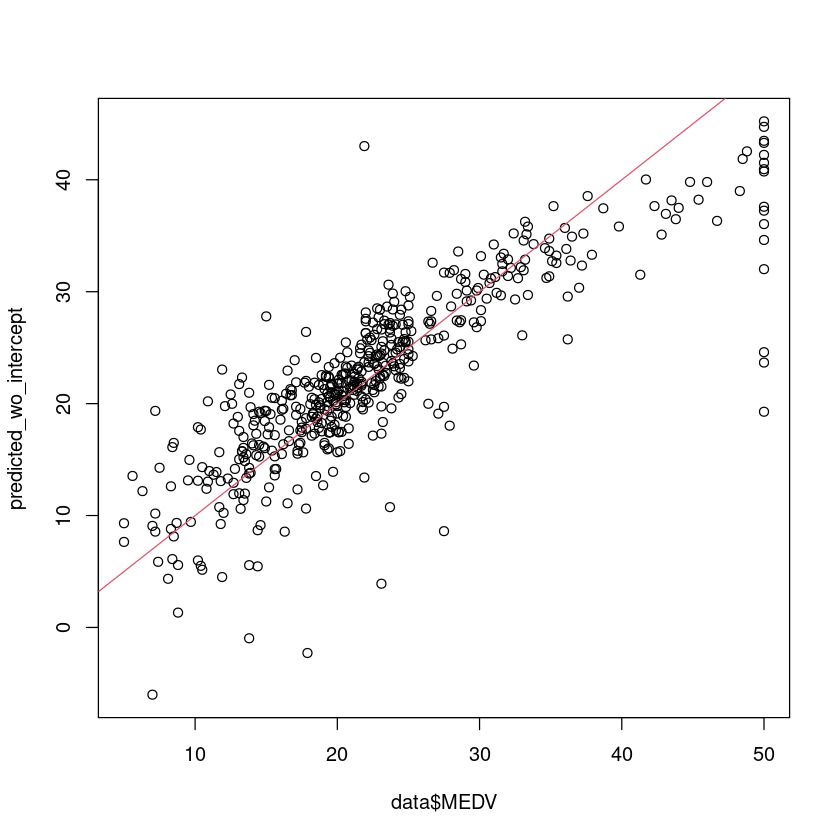

In [4]:
fit_lreg_wo_intercept=lm(MEDV~-1+.,data)
summary(fit_lreg_wo_intercept)
predicted_wo_intercept=predict(fit_lreg_wo_intercept,data)
plot(data$MEDV,predicted_wo_intercept)
abline(a=0,b=1,col=2)

Performance comparison on training data

actual variable value    residual 
1 24.0   lin_reg  30.00384 -6.003843
2 21.6   lin_reg  25.02556 -3.425562
3 34.7   lin_reg  30.56760  4.132403
4 33.4   lin_reg  28.60704  4.792964
5 36.2   lin_reg  27.94352  8.256476
6 28.7   lin_reg  25.25628  3.443716

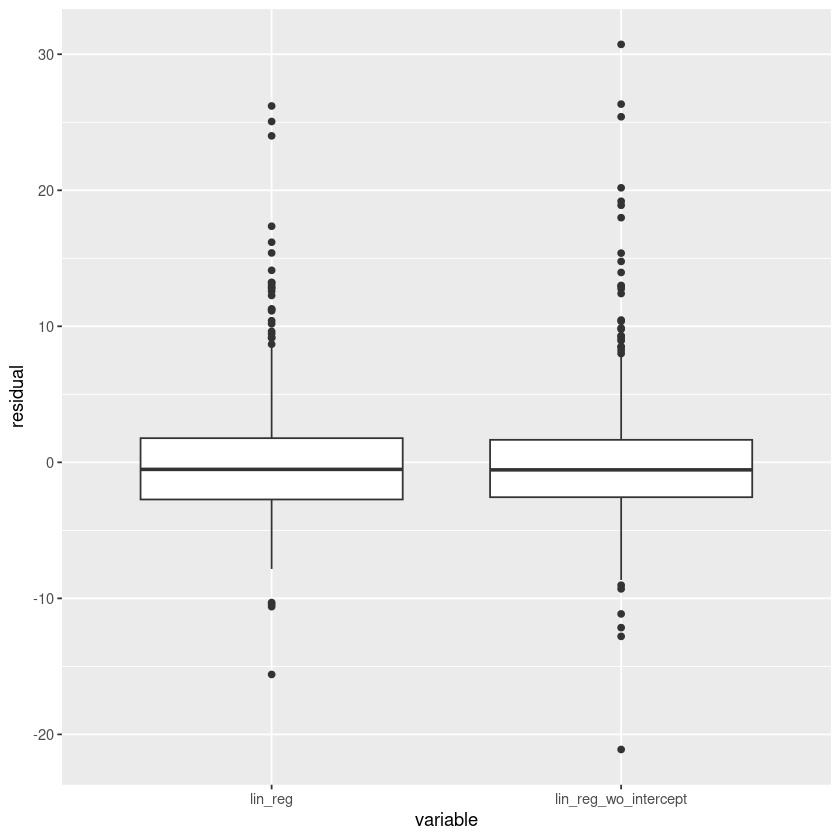

In [5]:
perf_data=data.table(actual=data$MEDV,lin_reg=predicted,lin_reg_wo_intercept=predicted_wo_intercept)
perf_data=melt(perf_data,id.vars=1)
perf_data[,residual:=actual-value]
head(perf_data)

ggplot(perf_data, aes(x=variable, y=residual)) + geom_boxplot() 

In [6]:
perf_summary=perf_data[,list(mse=mean(residual^2),bias=mean(residual),mape=mean(abs(residual/actual))),by=list(variable)]
perf_summary

variable             mse      bias          mape     
1 lin_reg              21.89483 -6.647482e-14 0.1641730
2 lin_reg_wo_intercept 24.16610  6.229567e-02 0.1720952

# Penalized regression approaches

In [7]:
set.seed(1)
noisy_part=matrix(rnorm(nrow(data)*(ncol(data)-1),sd=10),nrow=nrow(data))
noisy_data=cbind(data,noisy_part)
head(noisy_data)

CRIM    ZN INDUS CHAS NOX   RM    AGE  DIS    RAD TAX ⋯ V4         V5        
1 0.00632 18 2.31  0    0.538 6.575 65.2 4.0900 1   296 ⋯  -1.540148  23.833280
2 0.02731  0 7.07  0    0.469 6.421 78.9 4.9671 2   242 ⋯  18.542445  -4.639130
3 0.02729  0 7.07  0    0.469 7.185 61.1 4.9671 2   242 ⋯ -19.041674  -4.265004
4 0.03237  0 2.18  0    0.458 6.998 45.8 6.0622 3   222 ⋯   3.592997 -17.030952
5 0.06905  0 2.18  0    0.458 7.147 54.2 6.0622 3   222 ⋯  21.145349 -10.414974
6 0.02985  0 2.18  0    0.458 6.430 58.7 6.0622 3   222 ⋯ -11.357490   7.687350
  V6         V7        V8          V9         V10        V11       
1 -1.9494348 -3.660393 -10.7557163 20.5287473  11.627706 -17.653616
2 -6.8812544 -1.051739  -4.7425527 -9.9180507   4.345543   5.154540
3  0.8269864 16.602444  -0.6981258  1.3531262   2.913827  -2.777989
4  1.6814683 15.550776  -7.6252319 -4.5760323  -2.767994  -7.831652
5  8.0554673  4.432049  -5.7260970 -0.4842117 -18.106538  20.607305
6 -2.1220087 -4.386667 -11.2769199 -1.9229396  12.941958   3.394559
  V12          V13       
1   0.08500323   7.116684
2  -2.96454577 -12.352918
3   3.95107553 -10.331759
4 -24.12905805  -3.943052
5 -13.30997891  -4.493992
6 -17.35438198  -2.439676


Call:
lm(formula = MEDV ~ ., data = noisy_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.8926  -2.6993  -0.6178   2.0893  25.7494 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.723e+01  5.153e+00   7.225 1.99e-12 ***
CRIM        -1.011e-01  3.327e-02  -3.037 0.002516 ** 
ZN           4.115e-02  1.392e-02   2.955 0.003278 ** 
INDUS        2.450e-02  6.183e-02   0.396 0.692110    
CHAS         2.832e+00  8.810e-01   3.214 0.001395 ** 
NOX         -1.841e+01  3.880e+00  -4.743 2.78e-06 ***
RM           3.831e+00  4.215e-01   9.089  < 2e-16 ***
AGE         -1.422e-03  1.326e-02  -0.107 0.914603    
DIS         -1.470e+00  2.014e-01  -7.302 1.19e-12 ***
RAD          3.235e-01  6.781e-02   4.771 2.44e-06 ***
TAX         -1.311e-02  3.860e-03  -3.396 0.000741 ***
PTRATIO     -9.793e-01  1.331e-01  -7.360 8.05e-13 ***
B            9.673e-03  2.717e-03   3.560 0.000407 ***
LSTAT       -5.173e-01  5.102e-02 -10.140  < 2e-16 ***
V1     

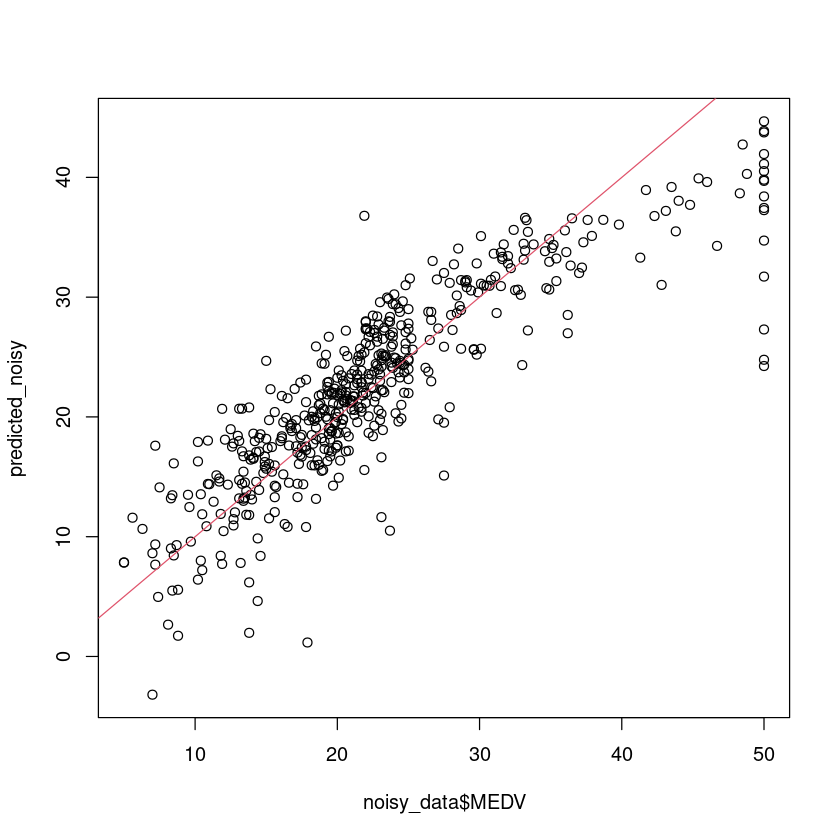

In [8]:
fit_lreg_noisy=lm(MEDV~.,noisy_data)
summary(fit_lreg_noisy)
predicted_noisy=predict(fit_lreg_noisy,noisy_data)
plot(noisy_data$MEDV,predicted_noisy)
abline(a=0,b=1,col=2)

variable             mse      bias          mape     
1 lin_reg              21.89483 -6.647482e-14 0.1641730
2 lin_reg_wo_intercept 24.16610  6.229567e-02 0.1720952
3 lin_reg_noisy        21.31277 -5.664368e-14 0.1650946

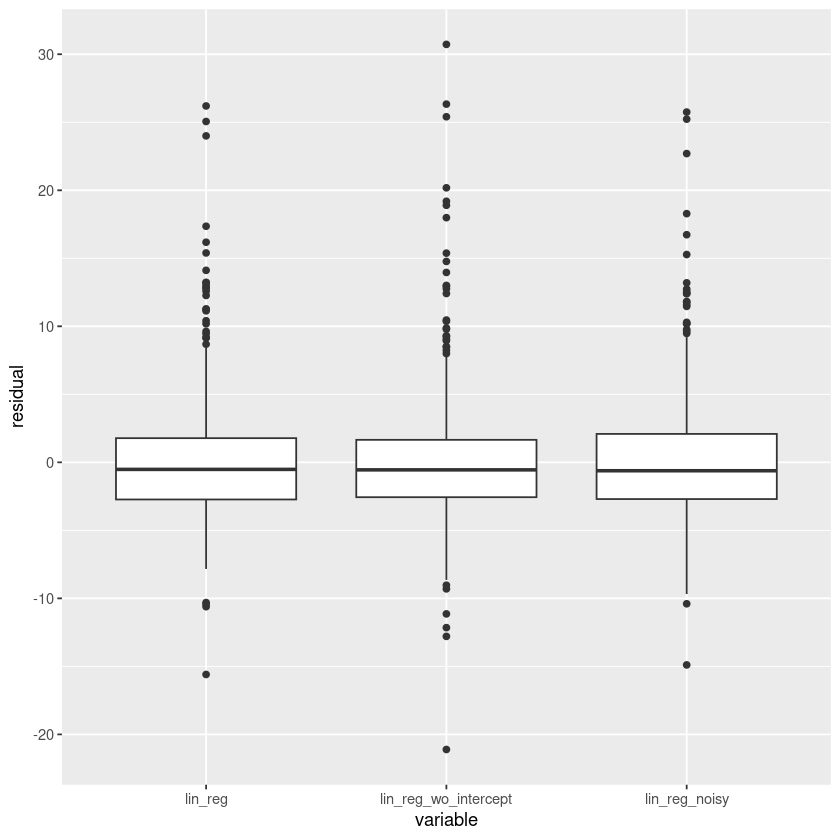

In [9]:
perf_data=data.table(actual=data$MEDV,lin_reg=predicted,
                     lin_reg_wo_intercept=predicted_wo_intercept,
                     lin_reg_noisy=predicted_noisy)
perf_data=melt(perf_data,id.vars=1)
perf_data[,residual:=actual-value]
require(ggplot2,quietly=T)
ggplot(perf_data, aes(x=variable, y=residual)) + geom_boxplot() 
perf_summary=perf_data[,list(mse=mean(residual^2),bias=mean(residual),mape=mean(abs(residual/actual))),by=list(variable)]
perf_summary

In [10]:
noisy_mat=as.matrix(noisy_data[,-c('MEDV'),with=F])
cvfit=cv.glmnet(noisy_mat,noisy_data$MEDV,family='gaussian',nfolds=10)
cvfit


Call:  cv.glmnet(x = noisy_mat, y = noisy_data$MEDV, nfolds = 10, family = "gaussian") 

Measure: Mean-Squared Error 

    Lambda Index Measure    SE Nonzero
min 0.0489    54   24.32 2.880      20
1se 0.4159    31   27.06 3.457       9

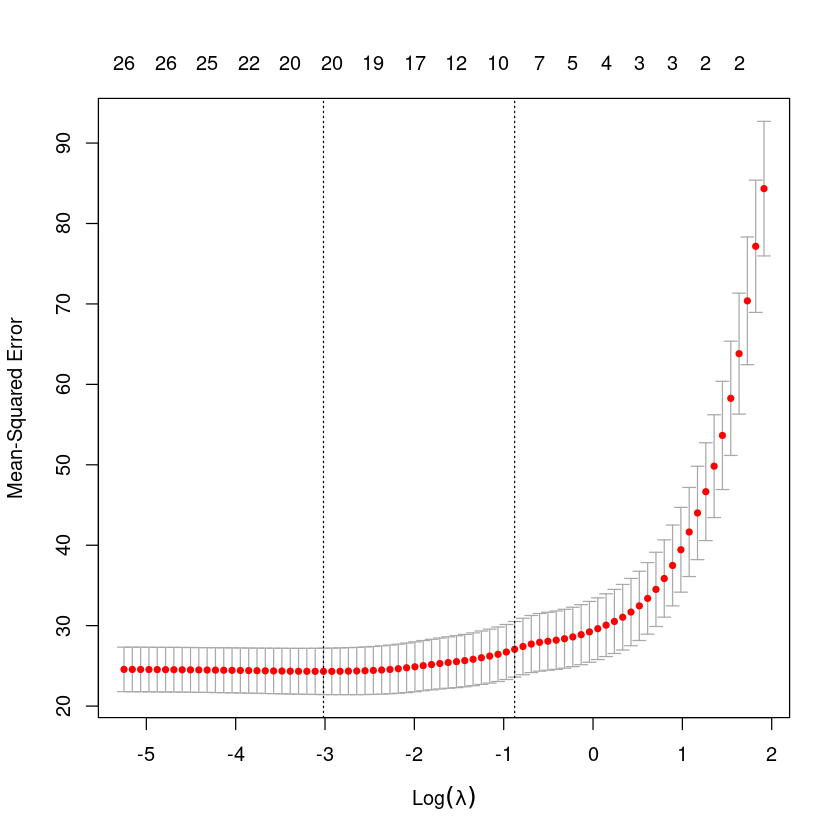

In [11]:
plot(cvfit)

In [12]:
coef(cvfit,s="lambda.min")

27 x 1 sparse Matrix of class "dgCMatrix"
                       s1
(Intercept)  33.480661083
CRIM         -0.085294473
ZN            0.033710147
INDUS         .          
CHAS          2.793981265
NOX         -15.965229054
RM            3.917264602
AGE           .          
DIS          -1.307445439
RAD           0.230894265
TAX          -0.008881805
PTRATIO      -0.934951473
B             0.009129427
LSTAT        -0.519592570
V1           -0.005181649
V2            .          
V3           -0.007817409
V4            .          
V5            .          
V6           -0.001905278
V7           -0.001445324
V8            .          
V9           -0.013875731
V10           0.045911412
V11           0.019984660
V12           0.035626739
V13           0.006087514

In [13]:
coef(cvfit,s="lambda.1se")

27 x 1 sparse Matrix of class "dgCMatrix"
                      s1
(Intercept) 16.193137425
CRIM        -0.018858774
ZN           .          
INDUS        .          
CHAS         1.829347469
NOX         -2.092330306
RM           4.262039644
AGE          .          
DIS         -0.238261719
RAD          .          
TAX          .          
PTRATIO     -0.769736420
B            0.006494704
LSTAT       -0.517205403
V1           .          
V2           .          
V3           .          
V4           .          
V5           .          
V6           .          
V7           .          
V8           .          
V9           .          
V10          0.010411148
V11          .          
V12          .          
V13          .          

In [14]:
predicted_min=predict(cvfit,noisy_mat,s='lambda.min')
predicted_se=predict(cvfit,noisy_mat,s='lambda.1se')

variable             mse      bias          mape     
1 lin_reg              21.89483 -6.647482e-14 0.1641730
2 lin_reg_wo_intercept 24.16610  6.229567e-02 0.1720952
3 lin_reg_noisy        21.31277 -5.664368e-14 0.1650946
4 lasso_min.lambda.min 21.45815  2.043522e-14 0.1636399
5 lasso_se.lambda.1se  25.19557  1.757952e-14 0.1752753

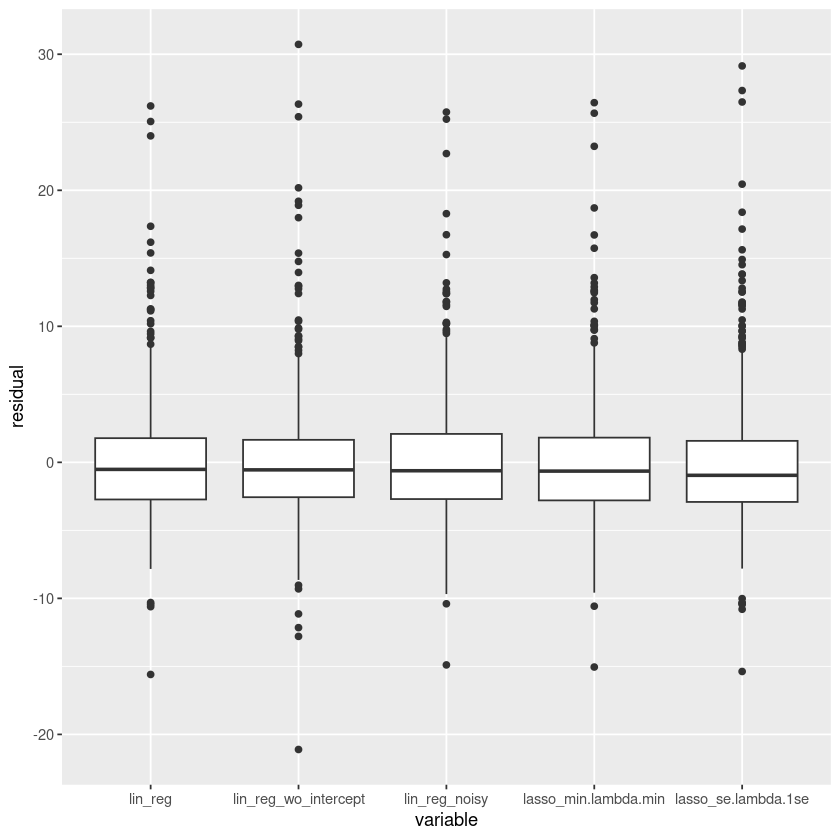

In [15]:
perf_data=data.table(actual=data$MEDV,lin_reg=predicted,
                     lin_reg_wo_intercept=predicted_wo_intercept,
                     lin_reg_noisy=predicted_noisy,
                     lasso_min=predicted_min, lasso_se=predicted_se)
perf_data=melt(perf_data,id.vars=1)
perf_data[,residual:=actual-value]
require(ggplot2,quietly=T)
ggplot(perf_data, aes(x=variable, y=residual)) + geom_boxplot() 
perf_summary=perf_data[,list(mse=mean(residual^2),bias=mean(residual),mape=mean(abs(residual/actual))),by=list(variable)]
perf_summary

In [16]:
log_reg=glm(is_expensive~.,classification_data,family='binomial')
summary(log_reg)


Call:
glm(formula = is_expensive ~ ., family = "binomial", data = classification_data)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) 12.369581   4.003846   3.089 0.002005 ** 
CRIM        -0.061307   0.064570  -0.949 0.342381    
ZN           0.017805   0.013617   1.308 0.191034    
INDUS        0.021489   0.043071   0.499 0.617833    
CHAS         1.719603   0.661869   2.598 0.009374 ** 
NOX         -6.593055   2.715828  -2.428 0.015197 *  
RM           1.535316   0.431688   3.557 0.000376 ***
AGE         -0.025074   0.010295  -2.436 0.014871 *  
DIS         -0.711635   0.169498  -4.198 2.69e-05 ***
RAD          0.253286   0.061133   4.143 3.42e-05 ***
TAX         -0.009961   0.002961  -3.364 0.000767 ***
PTRATIO     -0.539465   0.107420  -5.022 5.11e-07 ***
B            0.004022   0.002840   1.416 0.156811    
LSTAT       -0.326600   0.054795  -5.960 2.52e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion paramet

In [17]:
predicted=predict(log_reg,classification_data)
head(predicted)
predicted=predict(log_reg,classification_data,type='response')
head(predicted)

1         2         3         4         5         6 
3.7621602 0.8773479 4.1492133 3.7637982 3.0082414 1.8250000

1         2         3         4         5         6 
0.9772940 0.7062723 0.9844682 0.9773304 0.9529451 0.8611650

CRIM    ZN INDUS CHAS NOX   RM    AGE  DIS    RAD TAX PTRATIO B      LSTAT
[1,] 0.00632 18 2.31  0    0.538 6.575 65.2 4.0900 1   296 15.3    396.90 4.98 
[2,] 0.02731  0 7.07  0    0.469 6.421 78.9 4.9671 2   242 17.8    396.90 9.14 
[3,] 0.02729  0 7.07  0    0.469 7.185 61.1 4.9671 2   242 17.8    392.83 4.03 
[4,] 0.03237  0 2.18  0    0.458 6.998 45.8 6.0622 3   222 18.7    394.63 2.94 
[5,] 0.06905  0 2.18  0    0.458 7.147 54.2 6.0622 3   222 18.7    396.90 5.33 
[6,] 0.02985  0 2.18  0    0.458 6.430 58.7 6.0622 3   222 18.7    394.12 5.21

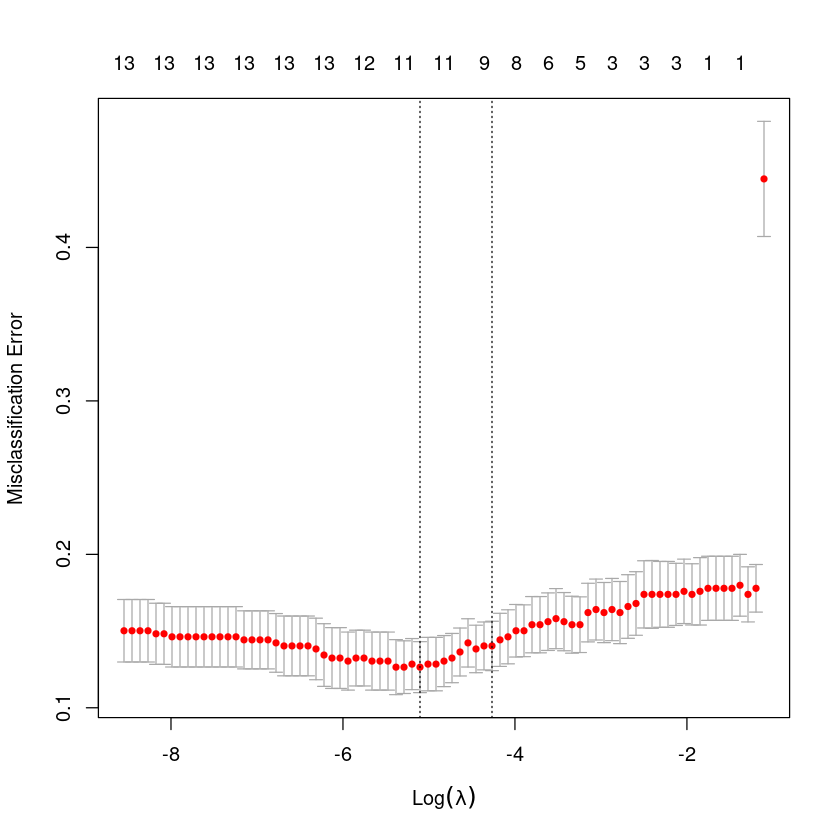

In [18]:
#? require(dummies)
#? model.matrix()

mat=as.matrix(classification_data[,-c('is_expensive'),with=F])
cvfit_class=cv.glmnet(mat,classification_data$is_expensive,family='binomial',type.measure='class')
plot(cvfit_class)

head(mat)

In [19]:
coef(cvfit_class,s="lambda.1se")

predicted_min=predict(cvfit_class,mat,s='lambda.min',type='response')
predicted_se=predict(cvfit_class,mat,s='lambda.1se',type='response')
summary(predicted_min)



14 x 1 sparse Matrix of class "dgCMatrix"
                      s1
(Intercept)  3.713445582
CRIM         .          
ZN           .          
INDUS        .          
CHAS         1.044216070
NOX         -1.231863902
RM           0.967357702
AGE         -0.011296511
DIS         -0.169050838
RAD          .          
TAX          .          
PTRATIO     -0.292207133
B            0.001856107
LSTAT       -0.250373117

   lambda.min       
 Min.   :0.0000221  
 1st Qu.:0.0912347  
 Median :0.5017386  
 Mean   :0.4940711  
 3rd Qu.:0.9074485  
 Max.   :0.9997428  

In [20]:
threshold=0.5
# log reg predictions
pred_class=as.numeric(predicted>threshold)

# pen log reg predictions
pred_min=as.numeric(predicted_min>threshold)

# pen log reg predictions
pred_se=as.numeric(predicted_se>threshold)



table(classification_data$is_expensive,pred_class)


   pred_class
      0   1
  0 224  32
  1  30 220

In [21]:
err_rate=1-sum(classification_data$is_expensive==pred_class)/nrow(classification_data)

In [22]:
err_rate

[1] 0.1225296

In [23]:
# pen log reg predictions
pred_min=as.numeric(predicted_min>threshold)

table(classification_data$is_expensive,pred_min)
err_rate=1-sum(classification_data$is_expensive==pred_min)/nrow(classification_data)
err_rate

   pred_min
      0   1
  0 224  32
  1  28 222

[1] 0.1185771

# pen log reg predictions



In [24]:
table(classification_data$is_expensive,pred_se)
err_rate=1-sum(classification_data$is_expensive==pred_se)/nrow(classification_data)
err_rate

   pred_se
      0   1
  0 222  34
  1  32 218

[1] 0.1304348